<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Climate change will disproportionately affect countries at lower sea levels. In anticipation of sea level rise, you have been hired by a non-profit to identify which countries are most at risk and to report back the top 5 countries where relief and aid should be directed.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Will be using top 20 countries that are considered at risk according to the following website:
https://www.envirotech-online.com/news/environmental-laboratory/7/breaking-news/which-countries-are-most-at-risk-of-rising-sea-levels/35807*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

**To-Do:** *Will be using the following datasets for the analysis: Population.csv, gni_per_cap_atlas_method_con2021.csv, gdp_pcap.csv. The Population.csv displays the population by country and year. The gni_per_cap_atlas_method_con2021.csv shows the Gross National Income (GNI) per capita in current US dollars by country and year. The gdp_pcap.csv shows the Gross Domestic Product (GDP) per capita in current US dollars by country and year.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Will be using top 20 countries that are considered at risk according to the following website:
https://www.envirotech-online.com/news/environmental-laboratory/7/breaking-news/which-countries-are-most-at-risk-of-rising-sea-levels/35807*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def my_mean(nums):
    n = len(nums)
    total = 0
    for num in nums:
        total += num
    return total/n

my_mean([3, 4, 5])

4.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def my_std(nums):
    standard_deviation = (sum([(num - my_mean(nums)) ** 2 for num in nums]) / len(nums)) ** (1/2)
    return standard_deviation

my_std([3, 4, 5])

0.816496580927726

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def string_to_num(string):
    string = str(string)
    if string[-1] == 'k' or string[-1] == 'K':
        new_string = (float(string[:-1])*1000)
    elif string[-1] == 'm' or string[-1] == 'M':
        new_string = (float(string[:-1])*1000000)
    elif string[-1] == 'b' or string[-1] == 'B':
        new_string = (float(string[:-1])*1000000000)
    else:
        new_string = float(string)
    return new_string


string_to_num('45K')

45000.0

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
# Code:

# Reading in the datasets
gni = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')
pop = pd.read_csv('../data/population.csv')
gdp = pd.read_csv('../data/gdp_pcap.csv')

In [6]:
# printing first 5 rows of the gni dataframe
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [7]:
# Data looks a bit messy above with the years as individual columns. Will bring years down as values for each row instead.
gni = gni.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="Value")

gni.head()

,country,Year,Value
0,Afghanistan,1800,207.0
1,Angola,1800,517.0
2,Albania,1800,207.0
3,United Arab Emirates,1800,738.0
4,Argentina,1800,794.0


In [8]:
# There is a lot of data to work with. Since we want to look at just the years between 2000 - 2050, we will filter below.
gni = gni[gni['Year'].between('2000', '2050')]

In [9]:
# # printing first 5 rows of the population dataframe
pop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [10]:
# Data looks a bit messy above with the years as individual columns. Will bring years down as values for each row instead.
pop = pop.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="Value")

pop.head()

,country,Year,Value
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [11]:
# There is a lot of data to work with. Since we want to look at just the years between 2000 - 2050, we will filter below.
pop = pop[pop['Year'].between('2000','2050')]
pop.head()

,country,Year,Value
39400,Afghanistan,2000,19.5M
39401,Angola,2000,16.4M
39402,Albania,2000,3.18M
39403,Andorra,2000,66.1k
39404,United Arab Emirates,2000,3.28M


In [12]:
# printing first 5 rows of the population dataframe
gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,599,599,599,599,599,599,599,599,599,...,4800,4910,5030,5150,5270,5390,5520,5650,5780,5920
1,Angola,465,466,469,471,472,475,477,479,481,...,24.8k,25.3k,25.9k,26.4k,26.9k,27.4k,28k,28.5k,29.1k,29.6k
2,Albania,585,587,588,590,592,593,595,597,598,...,54k,54.6k,55.2k,55.8k,56.4k,56.9k,57.5k,58.1k,58.7k,59.2k
3,Andorra,1710,1710,1710,1720,1720,1720,1730,1730,1730,...,79.3k,79.5k,79.8k,80.1k,80.4k,80.7k,81k,81.2k,81.5k,81.8k
4,UAE,1420,1430,1430,1440,1450,1450,1460,1460,1470,...,92.5k,92.6k,92.6k,92.7k,92.8k,92.9k,92.9k,93k,93.1k,93.1k


In [13]:
# Data looks a bit messy above with the years as individual columns. Will bring years down as values for each row instead.
gdp = gdp.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="Value")

gdp.head()

,country,Year,Value
0,Afghanistan,1800,599
1,Angola,1800,465
2,Albania,1800,585
3,Andorra,1800,1710
4,UAE,1800,1420


In [14]:
# There is a lot of data to work with. Since we want to look at just the years between 2000 - 2050, we will filter below.
gdp = gdp[gdp['Year'].between('2000','2050')]
gdp.head()

,country,Year,Value
39000,Afghanistan,2000,794
39001,Angola,2000,4400
39002,Albania,2000,6020
39003,Andorra,2000,48.5k
39004,UAE,2000,92.4k


In [15]:
# Check for missing values in the gni dataframe. There are 41 NAs in the Value column.
gni.isna().sum()

country     0
Year        0
Value      41
dtype: int64

In [16]:
# Check for missing values in the population dataframe. There are 50 NAs in the Value column.
pop.isna().sum()

country     0
Year        0
Value      50
dtype: int64

In [17]:
# Check for missing values in the gdp dataframe. There are no missing values.
gdp.isna().sum()

country    0
Year       0
Value      0
dtype: int64

In [18]:
# Check for any obvious issues with the observations (keep in mind reasonable values for each column).
# Checking to see which rows are NAs.
gni[gni['Value'].isna()].head()

,country,Year,Value
40210,Liechtenstein,2010,NaN
40401,Liechtenstein,2011,NaN
40592,Liechtenstein,2012,NaN
40783,Liechtenstein,2013,NaN
40974,Liechtenstein,2014,NaN


In [19]:
# Checking to see which rows are NAs.
pop[pop['Value'].isna()].head()

,country,Year,Value
39671,Holy See,2001,NaN
39868,Holy See,2002,NaN
40065,Holy See,2003,NaN
40262,Holy See,2004,NaN
40459,Holy See,2005,NaN


In [20]:
# Fix any errors you identified in steps 2-3.
# Missing values in gni and pop
# Will replace with 0 as the columns that are NAs will be filtered out since they don't meet our country requirement.
gni['Value'].fillna(0, inplace = True)
pop['Value'].fillna(0, inplace = True)
# gdp['Value'].fillna(0, inplace = True)

In [21]:
# Checking to see if NAs were replaced correctly.
gni.isna().sum()

country    0
Year       0
Value      0
dtype: int64

In [22]:
# Checking to see if NAs were replaced correctly.
pop.isna().sum()

country    0
Year       0
Value      0
dtype: int64

In [23]:
# Display the data types of each feature.
gni.dtypes

country    object
Year       object
Value      object
dtype: object

In [24]:
# Display the data types of each feature.
pop.dtypes

country    object
Year       object
Value      object
dtype: object

In [25]:
# Display the data types of each feature.
gdp.dtypes

country    object
Year       object
Value      object
dtype: object

In [26]:
# Fix any incorrect data types found in step 5.
# Fix any individual values preventing other columns from being the appropriate type.
# If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), 
# use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! 
# Hint: use .map() or .apply().
# Fixing column Value for each dataframe as it should be float and not an object.
gni['Value'] = gni['Value'].apply(string_to_num)
pop['Value'] = pop['Value'].apply(string_to_num)
gdp['Value'] = gdp['Value'].apply(string_to_num)

In [27]:
# Checking to make sure data type for Value column was fixed correctly.
gni.dtypes

country     object
Year        object
Value      float64
dtype: object

In [28]:
# Checking to make sure data type for Value column was fixed correctly.
pop.dtypes

country     object
Year        object
Value      float64
dtype: object

In [29]:
# Checking to make sure data type for Value column was fixed correctly.
gdp.dtypes

country     object
Year        object
Value      float64
dtype: object

In [30]:
# Rename Columns.
# Column names should be all lowercase.
# Column names should not contain spaces (underscores will suffice
# --this allows for using the df.column_name method to access columns in addition to df['column_name']).
# Column names should be unique and informative.
gni.rename(columns = {
    'country' : 'country',
    'Year' : 'year',
    'Value' : 'gni_per_capita'},
    inplace = True)

pop.rename(columns = {
    'country' : 'country',
    'Year' : 'year',
    'Value' : 'population'},
    inplace = True)

gdp.rename(columns = {
    'country' : 'country',
    'Year' : 'year',
    'Value' : 'gdp_per_capita'},
    inplace = True)

In [31]:
# Checking number of rows in dataframe as we will be filtering below and want to make sure the filter works correctly.
gni.shape

(9741, 3)

In [32]:
# Checking number of rows in dataframe as we will be filtering below and want to make sure the filter works correctly.
pop.shape

(10047, 3)

In [33]:
# Checking number of rows in dataframe as we will be filtering below and want to make sure the filter works correctly.
gdp.shape

(9945, 3)

In [34]:
# Drop unnecessary rows (if needed).
# Filtering all 3 dataframes by countries needed for analysis
# Using top 20 list from the following website:
# https://www.envirotech-online.com/news/environmental-laboratory/7/breaking-news/which-countries-are-most-at-risk-of-rising-sea-levels/35807
list = ('China', 'Vietnam', 'Japan', 'India', 'Bangladesh', 'Indonesia', 'Thailand', 'Netherlands', 'Philippines', 'Myanmar', 'USA', 'UK', 'Brazil', 'Germany', 'France', 'Malaysia', 'Taiwan', 'South Korea', 'Nigeria', 'Italy')
gni = gni[gni['country'].isin(list)]
pop = pop[pop['country'].isin(list)]
gdp = gdp[gdp['country'].isin(list)]

In [35]:
# Checking row count to make sure it reduced since we filtered above.
gni.shape

(867, 3)

In [36]:
# Checking row count to make sure it reduced since we filtered above.
pop.shape

(918, 3)

In [37]:
# Checking row count to make sure it reduced since we filtered above.
gdp.shape

(1020, 3)

In [38]:
# Merge dataframes that can be merged.
gni_pop_gdp_data = pd.merge(pd.merge(gni, pop, on =['country','year'], how = 'left'), gdp, on =['country','year'], how = 'left')
gni_pop_gdp_data.head()

,country,year,gni_per_capita,population,gdp_per_capita
0,Bangladesh,2000,660.0,1.290000e+08,2250.0
1,Brazil,2000,5890.0,1.760000e+08,11900.0
2,China,2000,1410.0,1.260000e+09,3800.0
3,Germany,2000,39200.0,8.160000e+07,43600.0
4,France,2000,37400.0,5.870000e+07,40800.0


In [39]:
# Perform any additional cleaning that you feel is necessary.
gni_pop_gdp_data.value_counts()

country      year  gni_per_capita  population    gdp_per_capita
Bangladesh   2000  660.0           1.290000e+08  2250.0            1
Netherlands  2021  52700.0         1.750000e+07  56600.0           1
             2010  64100.0         1.660000e+07  52000.0           1
             2011  63400.0         1.670000e+07  52600.0           1
             2012  60000.0         1.680000e+07  51900.0           1
                                                                  ..
India        2037  4060.0          1.590000e+09  12400.0           1
             2038  4150.0          1.600000e+09  12700.0           1
             2039  4240.0          1.600000e+09  13000.0           1
             2040  4330.0          1.610000e+09  13300.0           1
Vietnam      2050  7080.0          1.070000e+08  25500.0           1
Name: count, Length: 867, dtype: int64

In [40]:
# Making sure there are no NAs after merging dataframes.
gni_pop_gdp_data.isna().sum()

country           0
year              0
gni_per_capita    0
population        0
gdp_per_capita    0
dtype: int64

In [41]:
# Making sure the data types are correct after merging dataframes.
gni_pop_gdp_data.dtypes

country            object
year               object
gni_per_capita    float64
population        float64
gdp_per_capita    float64
dtype: object

In [42]:
# Save your cleaned and merged dataframes as csv files.
gni_pop_gdp_data.to_csv('../data/gni_pop_gdp_data.csv', index = False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**country**      |*object*|Gapminder - gdp_pcap.csv, gni_per_cap_atlas_method_con2021.csv, Population.csv| the name of the country
|**year**          |*object*|Gapminder - gdp_pcap.csv, gni_per_cap_atlas_method_con2021.csv, Population.csv| the individual year
|**gni_per_capita**|*float* |Gapminder - gni_per_cap_atlas_method_con2021.csv| the gross national income (units in US dollars)
|**population**    |*float* |Gapminder - Population.csv| the total population count by country
|**gdp_per_capita**|*float* |Gapminder - gdp_pcap.csv| the gross domestic product (units in US dollars)


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [43]:
# Looking at summary statistics for merged dataframe
gni_pop_gdp_data.describe()

,gni_per_capita,population,gdp_per_capita
count,867.000000,8.670000e+02,867.000000
mean,21948.627451,2.628016e+08,27011.972318
std,23097.229547,4.247010e+08,20024.524061
min,570.000000,1.590000e+07,1120.000000
25%,3195.000000,5.815000e+07,8690.000000
50%,9450.000000,9.290000e+07,20200.000000
75%,43150.000000,2.085000e+08,44600.000000
max,91400.000000,1.670000e+09,72000.000000


In [44]:
# Use a dictionary comprehension to apply the standard deviation function you created 
# in part 1 to each numeric column in one of your dataframes. No loops.
#Code:
sd = {}
sd['gni_per_capita'] = round(my_std(gni_pop_gdp_data['gni_per_capita']), 2)
sd['population'] = round(my_std(gni_pop_gdp_data['population']), 2)
sd['gdp_per_capita'] = round(my_std(gni_pop_gdp_data['gdp_per_capita']), 2)
sd

{'gni_per_capita': 23083.91,
 'population': 424455969.59,
 'gdp_per_capita': 20012.97}

In [45]:
# Sorting to look at countries with the most gni per capita
gni_pop_gdp_data.sort_values('gni_per_capita', ascending = False).head()

,country,year,gni_per_capita,population,gdp_per_capita
863,Netherlands,2050,91400.0,17900000.0,72000.0
846,Netherlands,2049,89500.0,17900000.0,71600.0
829,Netherlands,2048,87700.0,18000000.0,71200.0
812,Netherlands,2047,85800.0,18000000.0,70800.0
853,Germany,2050,85300.0,78900000.0,68200.0


#### Sorting the GNI Per Capita column to see the countries with the most GNI per capita, we see that the Netherlands will consistantly have the most GNI per capita from 2047 - 2050.

In [46]:
# Sorting to look at countries with the least gni per capita
gni_pop_gdp_data.sort_values('gni_per_capita').head()

,country,year,gni_per_capita,population,gdp_per_capita
16,Vietnam,2000,570.0,79000000.0,3730.0
33,Vietnam,2001,588.0,79800000.0,3910.0
50,Vietnam,2002,612.0,80600000.0,4120.0
51,Bangladesh,2003,641.0,137000000.0,2450.0
34,Bangladesh,2002,641.0,134000000.0,2370.0


#### On the contrary, looking at the lowest GNI per capita, we see that Vietnam had the lowest GNI per capita from 2000 - 2002.

In [47]:
# Sorting to look at countries with the most population
gni_pop_gdp_data.sort_values('population', ascending = False).head()

,country,year,gni_per_capita,population,gdp_per_capita
839,India,2049,5230.0,1.670000e+09,16400.0
856,India,2050,5340.0,1.670000e+09,16800.0
822,India,2048,5120.0,1.660000e+09,16000.0
805,India,2047,5010.0,1.660000e+09,15600.0
771,India,2045,4810.0,1.650000e+09,14900.0


#### Looking at the population column and sorting it by highest to lowest, we see that India takes the top points in having the most population and it looks like they will continue to have the most population in the future.

In [48]:
# Sorting to look at countries with the least population
gni_pop_gdp_data.sort_values('population').head()

,country,year,gni_per_capita,population,gdp_per_capita
13,Netherlands,2000,43200.0,15900000.0,48300.0
30,Netherlands,2001,40200.0,16000000.0,49000.0
64,Netherlands,2003,43100.0,16100000.0,48500.0
47,Netherlands,2002,39400.0,16100000.0,48700.0
81,Netherlands,2004,48800.0,16200000.0,49200.0


#### On the contrary, looking at the lowest population, we see that Netherlands had the lowest population in the 2000s.

In [49]:
# Sorting to look at countries with the most gdp per capita
gni_pop_gdp_data.sort_values('gdp_per_capita', ascending = False).head()

,country,year,gni_per_capita,population,gdp_per_capita
863,Netherlands,2050,91400.0,17900000.0,72000.0
846,Netherlands,2049,89500.0,17900000.0,71600.0
829,Netherlands,2048,87700.0,18000000.0,71200.0
812,Netherlands,2047,85800.0,18000000.0,70800.0
795,Netherlands,2046,84100.0,18000000.0,70300.0


#### Looking at the GDP Per Capita column from highest to lowest, we see that the Netherlands will have the highest GDP per capita in the future.

In [50]:
# Sorting to look at countries with the least gdp per capita
gni_pop_gdp_data.sort_values('gdp_per_capita').head()

,country,year,gni_per_capita,population,gdp_per_capita
10,Myanmar,2000,709.0,45500000.0,1120.0
27,Myanmar,2001,736.0,46000000.0,1230.0
44,Myanmar,2002,772.0,46500000.0,1340.0
61,Myanmar,2003,782.0,46900000.0,1470.0
78,Myanmar,2004,777.0,47300000.0,1640.0


#### On the contrary, we see that Myanmar had the lowest GDP per capita in the 2000s.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

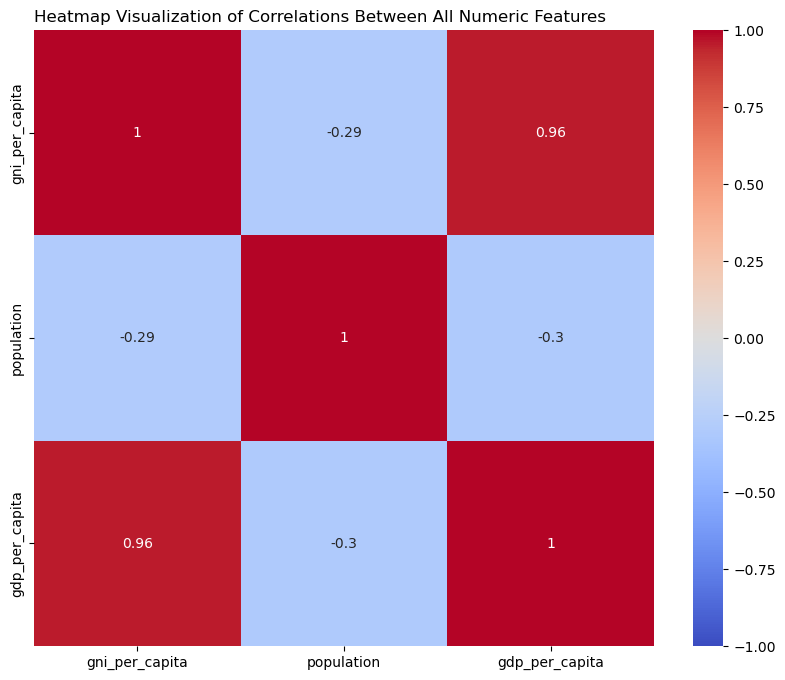

In [51]:
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.
# Heatmaps are generally not appropriate for presentations, and should often be excluded from 
# reports as they can be visually overwhelming. However, they can be extremely useful in 
# identify relationships of potential interest (as well as identifying potential collinearity before modeling).
# Please take time to format your output, adding a title. Look through some of the additional arguments and options. 
# (Axis labels aren't really necessary, as long as the title is informative).
# Code
plt.figure(figsize = (10,8))
sns.heatmap(gni_pop_gdp_data.corr(numeric_only = True), vmin = -1, cmap = 'coolwarm', annot = True)
plt.title('Heatmap Visualization of Correlations Between All Numeric Features', loc = 'left');

#### Looking at the heatmap above, we can see that there seems to be a strong positive relationship between gdp per capita and gni per capita. Population does not seem to have any relationship with any of the other columns.

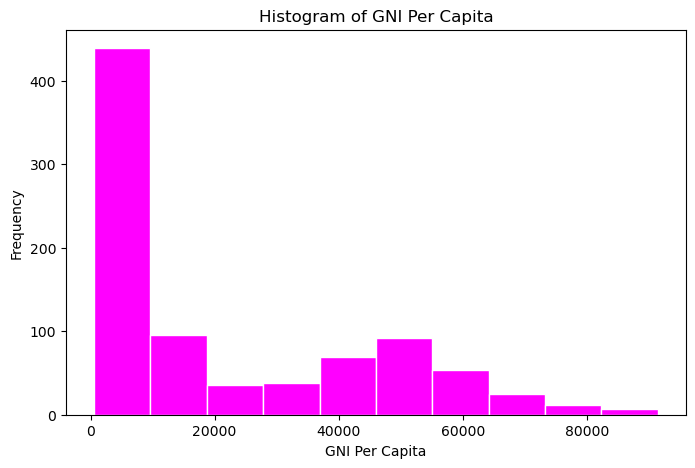

In [52]:
# Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
# OPTIONAL: Summarize the underlying distributions of your features (in words & statistics)
# Be thorough in your verbal description of these distributions.
# Be sure to back up these summaries with statistics.
# We generally assume that data we sample from a population will be normally distributed. 
# Do we observe this trend? Explain your answers for each distribution and how you think this will 
# affect estimates made from these data.

# Histogram of GNI per capita
plt.figure(figsize = (8,5))
plt.hist(gni_pop_gdp_data['gni_per_capita'], bins = 10, color = 'fuchsia', edgecolor = 'white')
plt.title('Histogram of GNI Per Capita')
plt.xlabel('GNI Per Capita')
plt.ylabel('Frequency');

#### Looking at the histogram above of GNI per capita, we can see that most of the data is in the 0-10,000 bin.

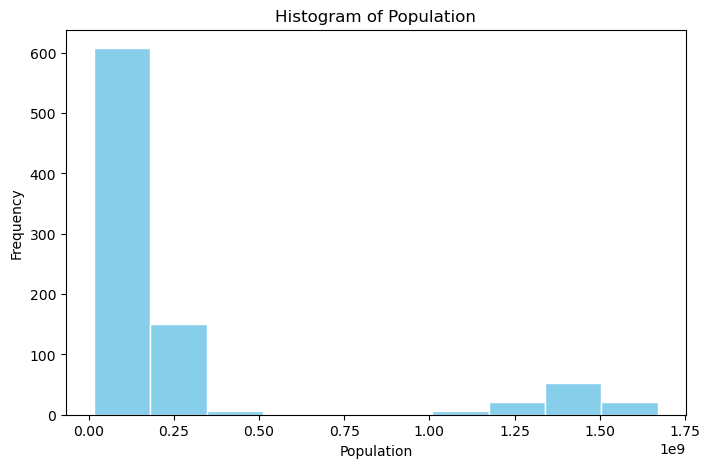

In [53]:
# Histogram of Population
plt.figure(figsize = (8,5))
plt.hist(gni_pop_gdp_data['population'], bins = 10, color = 'skyblue', edgecolor = 'white')
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency');

#### Looking at the histogram of Population, we can see that most of the data is in the 0 - 0.2M bucket. The highest population is 1.6B.

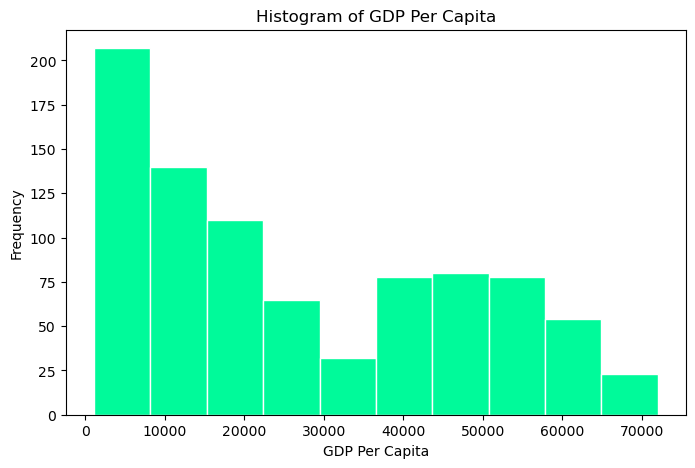

In [54]:
# Histogram of GDP per capita
plt.figure(figsize = (8,5))
plt.hist(gni_pop_gdp_data['gdp_per_capita'], bins = 10, color = 'mediumspringgreen', edgecolor = 'white')
plt.title('Histogram of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency');

#### Looking at the histogram of GDP per capita, we can see that most of the data is in the 0-8500 bucket.

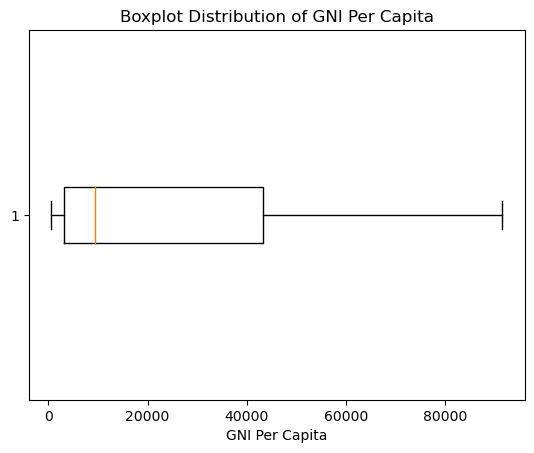

In [55]:
# Plot and interpret boxplots.
# Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant 
# with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
# Multiple values can be plotted to a single boxplot as long as they are of the same relative scale 
# (meaning they have similar min/max values).
# Each boxplot should:
# Only include variables of a similar scale
# Have clear labels for each variable
# Have appropriate titles and labels

# Boxplot of GNI per capita
plt.boxplot(gni_pop_gdp_data['gni_per_capita'], vert = False)
plt.title('Boxplot Distribution of GNI Per Capita')
plt.xlabel('GNI Per Capita');

#### Looking at the boxplot distribution of GNI Per Capita, we see that the mean (orange line) is low while the max value of the dataset is far out. It does not seem there are any outliers as all values fall within range.

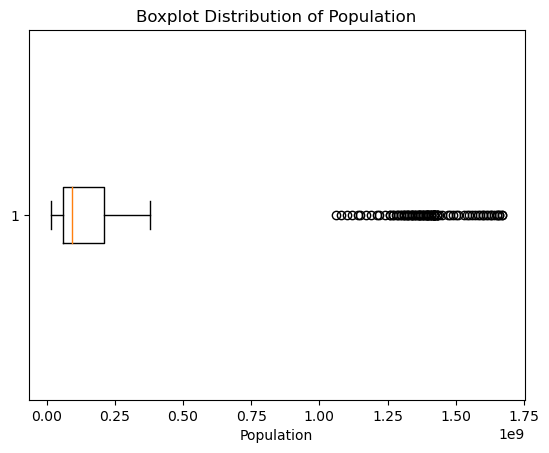

In [56]:
# Boxplot of population
plt.boxplot(gni_pop_gdp_data['population'], vert = False)
plt.title('Boxplot Distribution of Population')
plt.xlabel('Population');

#### Looking at the boxplot distribution of Population, we see that the mean (orange line) is low while the max value of the dataset is far out. It seems there are a lot of outliers as there are values that fall outside of the range.

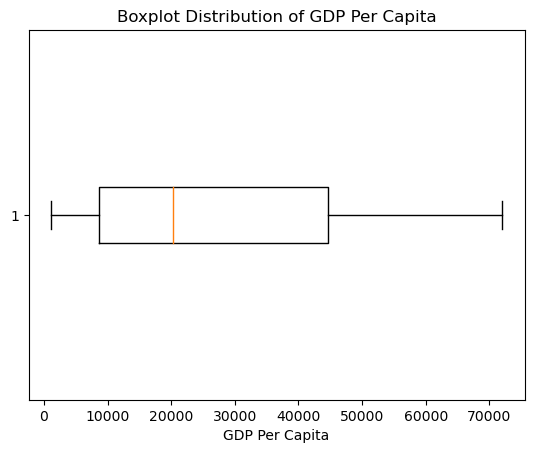

In [57]:
# Boxplot of GDP per capita
plt.boxplot(gni_pop_gdp_data['gdp_per_capita'], vert = False)
plt.title('Boxplot Distribution of GDP Per Capita')
plt.xlabel('GDP Per Capita');

#### Looking at the boxplot distribution of GDP Per Capita, we see that the mean (orange line) is low while the max value of the dataset is far out. It does not seem there are any outliers as all values fall within range.

In [58]:
# Plot and interpret scatter plots to view relationships between features. 
# Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
# Your plots should have:
# Two clearly labeled axes
# A proper title
# Colors and symbols that are clear and unmistakable

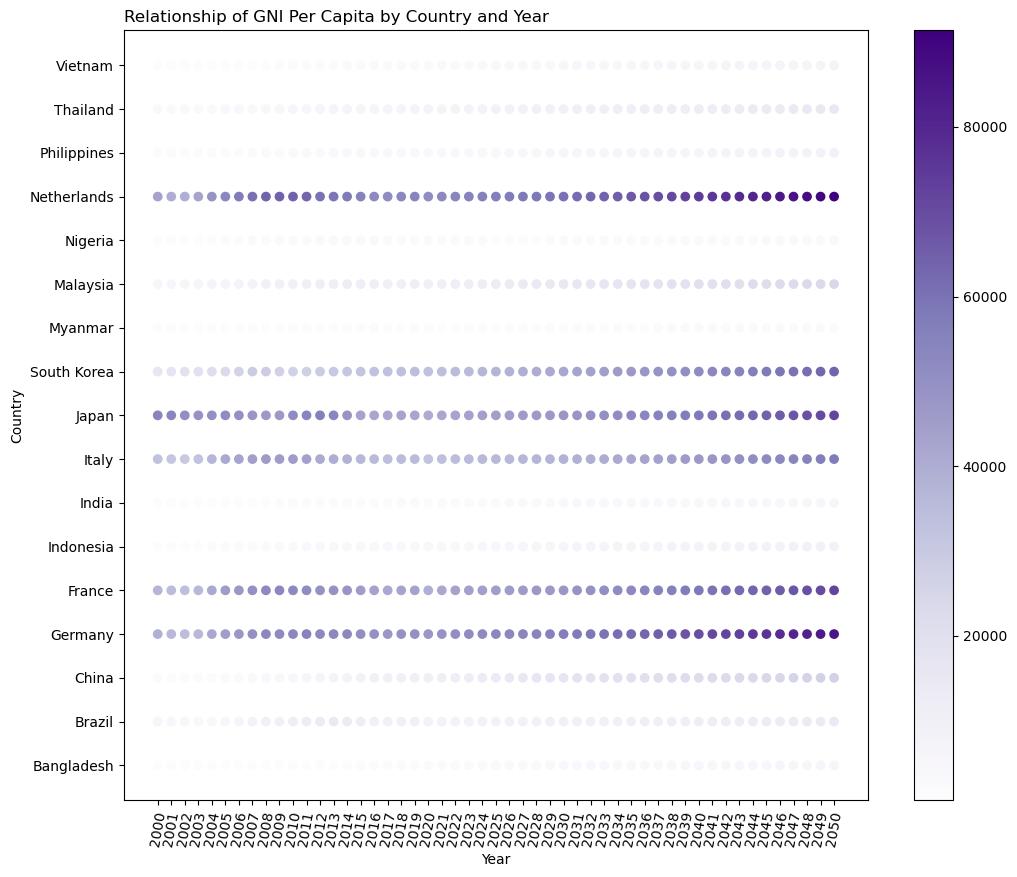

In [59]:
# Scatterplot of GNI per capita by Country and Year
plt.figure(figsize = (12,10))
plt.scatter(gni_pop_gdp_data['year'], gni_pop_gdp_data['country'], c=gni_pop_gdp_data['gni_per_capita'], cmap = 'Purples')
plt.colorbar()
plt.title('Relationship of GNI Per Capita by Country and Year', loc = 'left')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation = 80)
plt.savefig('Relationship-of-GNI-Per-Capita-by-Country-and-Year.jpeg', dpi=200);

#### Looking at the scatterplot above, we see that for a few countries the GNI per Capita is growing more compared to some of the other countries. We can assume the economy of these countries is doing well.

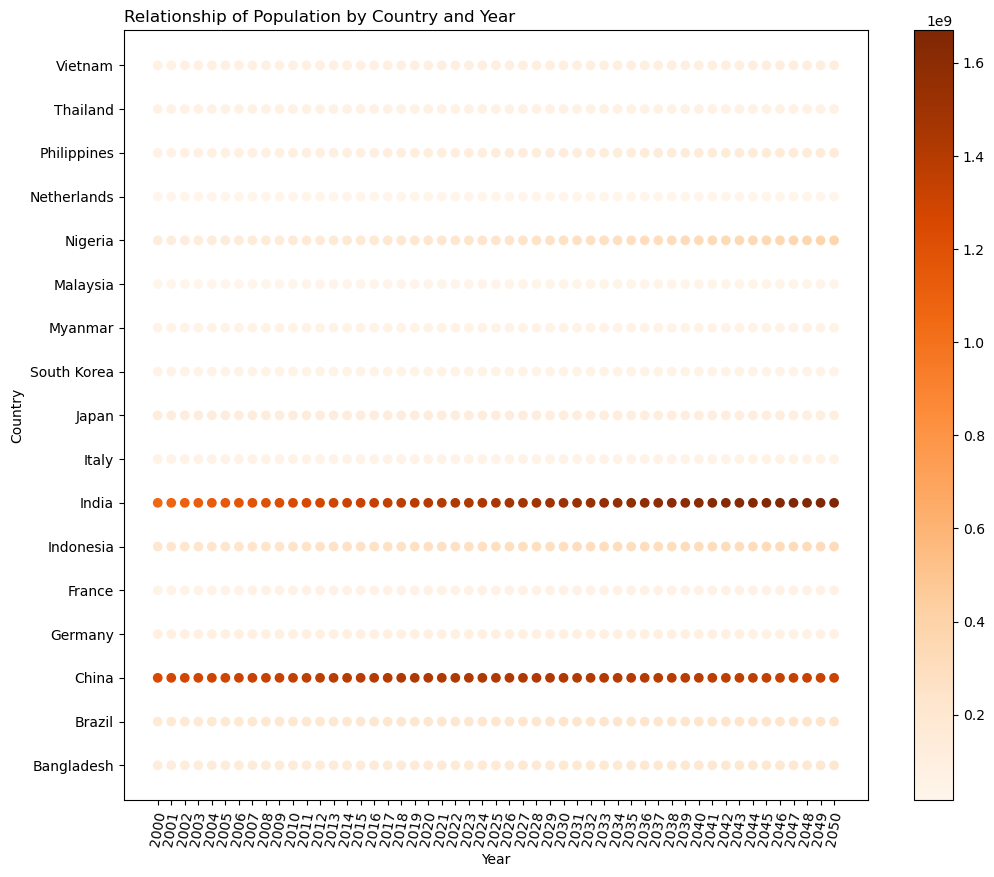

In [60]:
# Scatterplot of population by Country and Year
plt.figure(figsize = (12,10))
plt.scatter(gni_pop_gdp_data['year'], gni_pop_gdp_data['country'], c=gni_pop_gdp_data['population'], cmap = 'Oranges')
plt.colorbar()
plt.title('Relationship of Population by Country and Year', loc = 'left')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation = 80)
plt.savefig('Relationship-of-Population-by-Country-and-Year.jpeg', dpi=200);

#### Looking at the scatterplot above, we see that for a few countries the population is growing at a faster rate compared to some of the other countries. 

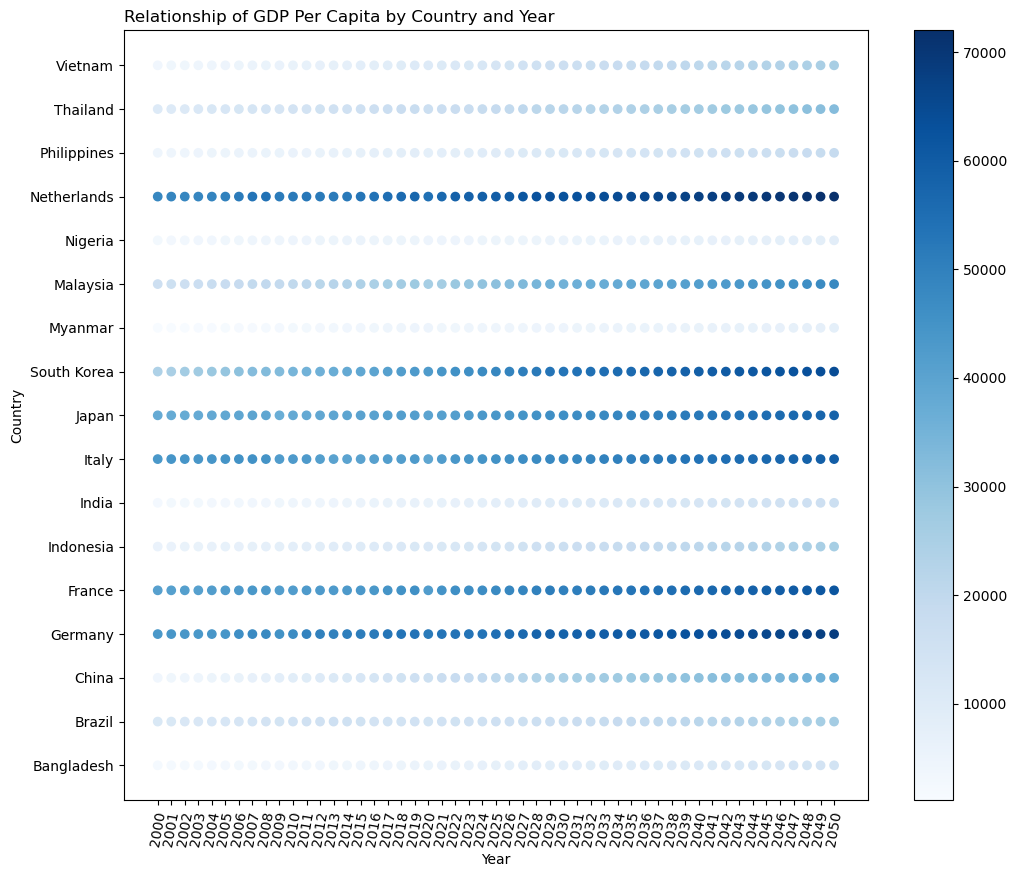

In [61]:
# # Scatterplot of GDP per capita by Country and Year
plt.figure(figsize = (12,10))
plt.scatter(gni_pop_gdp_data['year'], gni_pop_gdp_data['country'], c=gni_pop_gdp_data['gdp_per_capita'], cmap = 'Blues')
plt.colorbar()
plt.title('Relationship of GDP Per Capita by Country and Year', loc = 'left')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation = 80)
plt.savefig('Relationship-of-GDP-Per-Capita-by-Country-and-Year.jpeg', dpi=200);

#### Looking at the scatterplot above, we see that for a few countries the GDP per Capita is growing more compared to some of the other countries. We can assume the economy of these countries is doing well.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

**Problem Statement** : Climate change will disproportionately affect countries at lower sea levels. The objective of this project is to take the top 20 countries identified as being most at risk, look at the GNI, GDP and population trends between the years 2000 - 2050 and to report back the top 5 countries where relief and aid should be directed.

**Conclusions and Recommendations** : Based on the exploration of the data above, we can conclude that the top 5 countries where relief and aid should be directed are Vietnam, Bangladesh, India, Nigeria, and Myanmar. These countries have the lowest GNI per Capita and GDP per Capita, which means they would more open to financial help. In terms of population, India was the only country with the most population. All of the other countries had average populations.